# Лекция 1. Введение в дисциплину  "Системное программирование"

1. Цели курса. Содержание и структура курса. Учебная литература.
2. Основные понятия.
3. Исторический экскурс. Различные архитектуры ЦП.
4. Виды ассемблеров, диалекты.
5. Первые примеры работы на языке ассемблера. Азы работы в командной строке Linux.

## 1. Цель курса. Содержание и структура курса. Учебная литература.

Целью курса является изучение программирования на языке ассемблера для возможной оптимизации программ на языках высокого уровня, понимания механизмов работы исполняемых программ через их дизассемблирование, программирование устройств с ограниченными ресурсами с критическими требованиями к скорости выполнения.

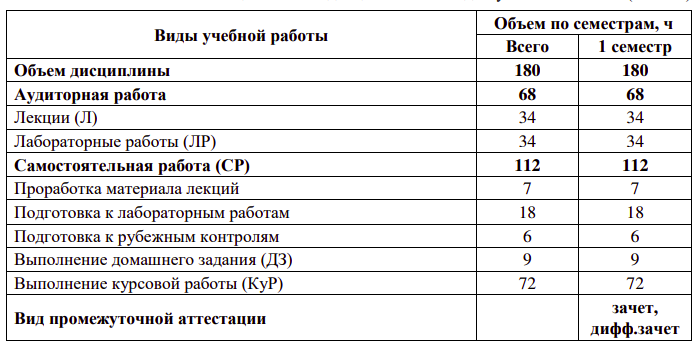

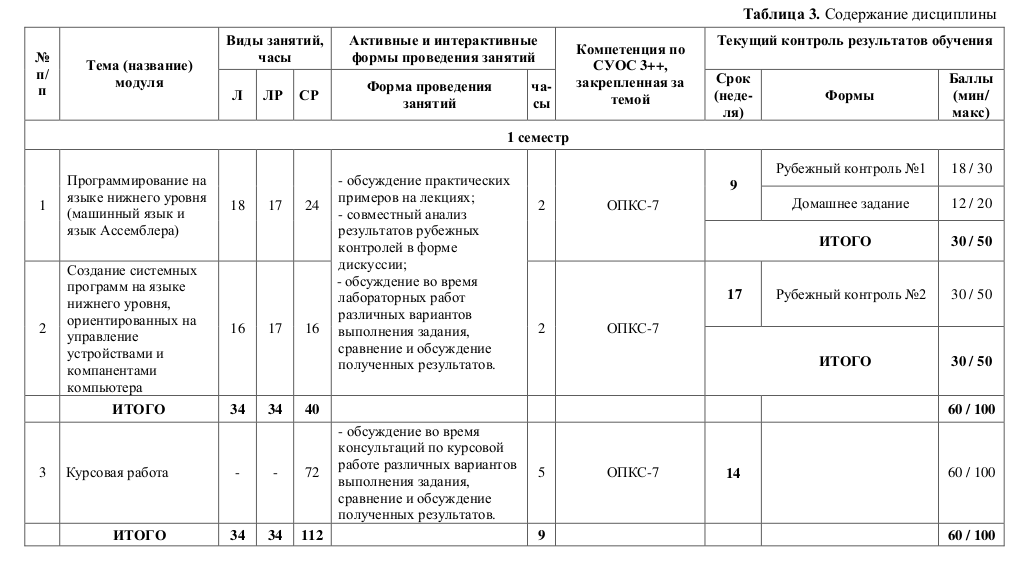

Традиционные направления использования программ низкого уровня (ассемблера):

- Написание драйверов, программирование контроллеров.
- Написание компонент операционных систем (загрузчики) или операционных систем в целом: KolibriOS написана на fasm.
- Написание специального программного обеспечения: антивирусов или вирусов, дизассемблирование программ для их коррекции.
- Написание ассемблерных вставок на языках высокого (среднего) уровня типа С/C++.
- Оптимизация программ на языках высокого уровня.

И конечно, изучение ассемблера, в первую очередь  - это попытка разобраться от А до Я как устроен и работает современный компьютер.

**Учебная литература**:

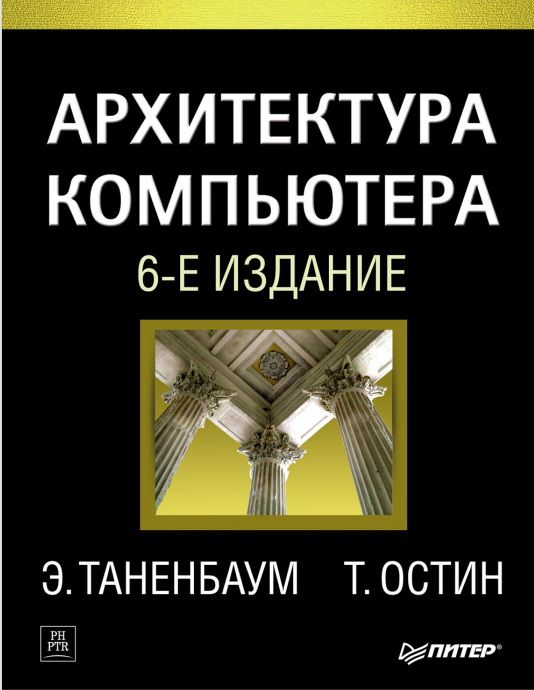
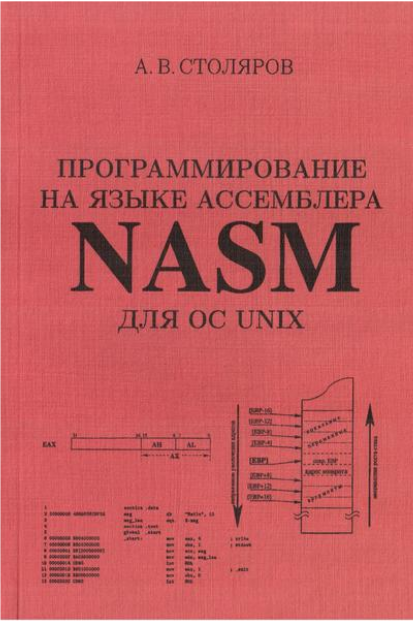

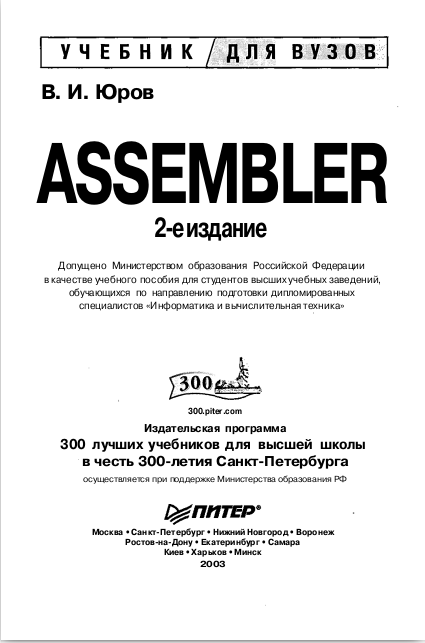
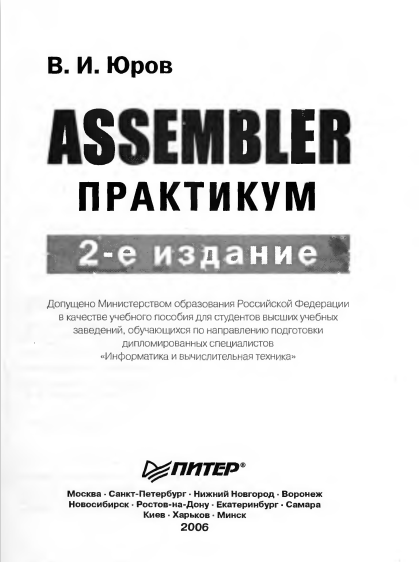

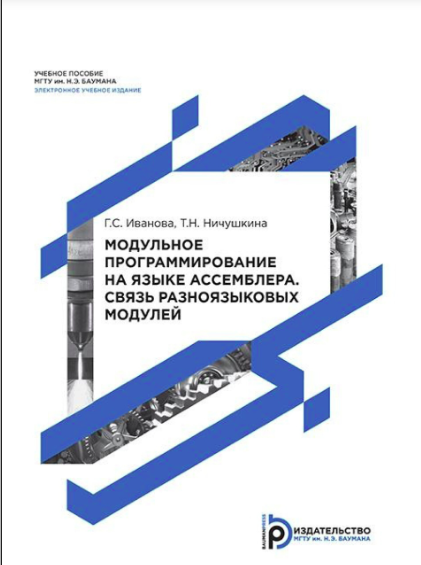
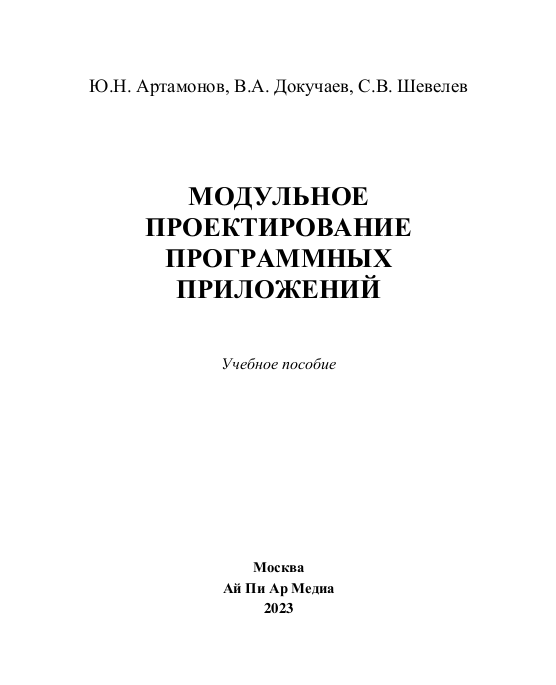

Учебные материалы будут располагаться в репозитории на https://github.com/junaart/System_programming

## 2. Основные понятия.

При программировании на низком уровне приходится сталкиваться и учитывать все особенности архитектуры. Поэтому основным понятием является **центральный процессор (ЦП)** - важнейшая часть любой компьютерной системы, которая выполняет все основные вычислительные действия. В каждый момент времени ЦП выполняет инструкцию или **машинную команду** - фактически это обычное число, которое хранится в памяти, за которым закреплено определенное действие ЦП. Набор таких действий ЦП довольно ограничен и связан с возможностью манипулирования имеющимися в распоряжении ЦП ресурсами. С этими ресурсами ЦП связан специальной **системной шиной**, которая сама по себе делится на три части: **шина адреса**, **шина данных**, **шина управления**. К доступным ресурсам относятся **системная память** и **внешние устройства** (винчестер, монитор и т.д.). Однако взаимодействие ЦП с внешними устройствами происходит опосредовано через **контроллеры** - контроллер ввода-вывода, контроллер прерываний, USB-контроллер, контроллер прямого доступа к памяти. Контролерры позволяют корректно интерпретировать поступающую от ЦП информацию для конкретного внешнего устройства.

Важнейшая составляюшая любой системы - системная память, она делится на два вида: **физическая**, **линейная**.
Адреса физической памяти характеризуют реальное расположение данных в физической памяти (**физические адреса**). Набор физических адресов, с которым работает программа, называют **физическим адресным пространством**. Линейная память - это логическая адресация памяти - массив байт без определенной структуры.

Процессор тоже имеет свою память двух видов: **кэш-память** и **регистровую память**. Кэш-память - это такая же системная память, только находящаяся внутри кристала процессора (поэтому доступ к ней ЦП существенно быстрее). Физически различия все же есть: кэш-память - более дорогая статическая (отсутствуют процессы регенерации - построена на триггерах, которые не нужно подзаряжать), основная память - более дешевая динамическая, построена по принципу конденсатора, заряд которого приходится переодически обновлять (регенерировать). Кэш-память всегда является копией основной памяти, к которой ЦП часто обращается.

Регистровая память включает в себя множество регистров. Регистр  - это ячейка памяти внутри процессора, которая хранит некоторое число определенной разрядности. В зависимости от архитектуры процесора регистры бывают разной разрядности: 8, 16, 32, 64 разрядные. Фактически регистры  - это руки процессора, чтобы что-то сделать с числами, они должны попасть в регистры процессора. 

Те регистры, которые могут хранить любую информацию, называются **регистрами общего назначения** (РОН), другие регистры могут хранить только определенную информацию, они называются **регистрами специального назначения** (РСН). 

Например, ЦП использует специальный регистр в качестве указателя следующей к выполнению инструкции (в зависимости от архитектуры он имеет различные названия  RIP (64), EIP(32), IP(16)). После выполнения очередной инструкции процессор читает инструкцию из адреса, на который указывает регистр EIP, определяет её размер и обновляет адрес в регистре EIP (прибавляет к значению в регистре EIP размер текущей инструкции). После выборки инструкции из памяти и изменения регистра EIP процессор приступает к её выполнению. 

Инструкция может выполняться от одного до нескольких десятков процессорных тактов. В процессе выполнения инструкции может измениться адрес в регистре EIP. При изменении адреса в регистре EIP следующей будет выполнена именно та инструкция, адрес которой содержит регистр EIP – иными словами, произойдёт переход, или прыжок. 

Внутри ЦП также находится специальный модуль, отвечающий за выполнение арифметических и логических действий - **арифметико-логическое устройство** (АЛУ). АЛУ реализует алгоритмы сложения, умножения, сравнения чисел и т.д.

Ещё одно важное понятие – это **стек**. Стек – это специальная область памяти, которая используется для хранения промежуточных данных. Представьте, что одна подпрограмма вызывает другую; вызываемая подпрограмма завершила свое выполнение, и теперь ей надо передать управление подпрограмме, которая её вызвала. Адрес команды, к которой надо вернуться после выполнения вызванной подпрограммы, находится на верхушке стека. При выполнении команды возврата из подпрограммы (RET) адрес возврата извлекается из верхушки стека и происходит передача управления по этому адресу.

Процессор работает раз за разом, выполняя **цикл обработки команды**. В начале этого цикла из ячеек памяти, на которые указывает счетчик команд, считывается код очередной команды, после чего счетчик команд получает прирашение, например, если прочитанная команда занимала три ячейки памяти, то счетчик увеличиветмся на три. Схемы процессора дешифруют полученный код и выполняют действия, предписанные этим кодом. После завершения команды, процессор вновь возвращается к началу цикла обработки команд. Некоторые команды могут изменить последовательность выполнения команд. Такие команды называют **командами перехода**. Различают **условные** и **безусловные** переходы. Команда условного перехода сначала проверяет истинность некоторого условия, и производит переход, только если условие выполнено. 

Таким образом, вся сущность работы процессора заключается в выполнении команд. Однажды включившись, он всегда
должен выполнять команды до тех пор, пока он не выключится или не перейдёт в специальное «подвешенное» состояние (ждущий режим).



Описанную структуру компьютерной системы демонстрирует следующий рисунок:

<img src="Fig1.jpeg" style="height: 600px; width:800px;"/>




При работе с памятью на низком уровне важно также понимать, что все современные операционные системы являются **многозадачными** - т.е. одновременно может выполняться сразу несколько задач. Поэтому необходимо защитить выполняемые и лежащие в общей памяти программы друг от друга. Это реализуется через **механизм защиты памяти**: каждой выполняющейся программе выделяется определенная область памяти, и к ячейкам за пределами такой области программа обращаться не может. Кроме того, чтобы ограничить возможности пользовательской программы часть машинных инструкций принято считать **привилигированными**. Процессор может работать в привилигированном режиме  или в **ограниченном режиме**, который также называют **пользовательским режимом**. Операционная система, очевидно, выполняется в привилигированном режиме, а при передаче управления программе пользователя переключается в ограниченный режим. К категории привилигированных относятся инструкции взаимодействия с внешними устройствами, настройки механизмов защиты памяти. Таким образом, всё взаимодействие с внешним миром пользовательская программа производит через обрашение к операционной системе, которое называется **системным вызовом**. (Даже простой вывод на экран - это системный вызов).

## 3. Исторический экскурс. Различные архитектуры ЦП.

Исторически сложилось так, что все процессоры, которыми мы пользовались, называются процессорами x86. 

Архитектура **x86** обозначает большое семейство процессоров как с 16-битной, так и с 32-битной архитектурой набора команд. История x86 началась с выходом процессора Intel 8086 в 1978 году. В 1979 году выходит функционально похожий на 8086 процессор Intel 8088. Последующие поколения этой серии процессоров получили названия 80186, 80286, 80386 и 80486, что привело к возникновению термина «x86» как сокращению для семьи процессоров. В последствии процессоры и серии процессоров Intel, которые представляли эту архитектуру, имели совершенно другие имена, например, серии Pentium, Celeron и т.д., но они принадлежали также к этой архитектуре. 

Кроме компании Intel процессоры на архитектуре x86 также выпускала компания AMD, в частности, это серии процессоров Athlon, Duron и т.д.

Процессоры 8086 и 8088 были 16-битными, несмотря на 8-битную шину данных в 8088. Регистры в этих процессорах имели разрядность 16 бит, а набор инструкций работал с 16-битными данными. 8086 и 8088 не поддерживали многие функции современных процессоров, например, виртуальную память и уровни защиты. Эти процессоры имели 20 адресных линий, что ограничивало размер используемой память 1 мегабайтом. Но 20-битный адрес не мог поместиться в 16-битный регистр, поэтому для работы с адресами необходимо было использовать несколько сложную систему сегментных регистров и смещений для доступа к полному адресному пространству размером 1 МБ.

В 1985 году компания Intel выпустила процессор 80386, который был важным шагом вперед в развитии архитектуры x86. Этот процессор был 32-битным. И адреса, регистры и АЛУ также имели разрядность в 32 бита, а инструкции изначально работали с операндами размером до 32 бит. Кроме того, он использовал защищенный режим (protected mode), в котором был реализан многоуровневый механизм привилегий из трех уровней - от 0 до 3. Уровень 0 представлял уровень с максимальными правами и предназначался для ядра операционной системы, тогда как уровень 3 предназначался для прикладных пользовательских программ. Уровни 1 и 2 - промежуточные. Стоит отметить, что операционные системы Windows и Linux до сих пор реализуют только 2 уровня - 0 и 3. 80386 поддерживал память размером 4 ГБ, в которой адреса были 32-битными, а манипуляции с сегментными регистрами и смещениями больше не требовались. Кроме того, была добавлена поддержка выгружаемой виртуальной памяти.

После этого процессоры данной архитектуры стали 32-битными.

Архитектура x86 имеет прямой порядок следования байтов (little-endian) что означает, что многобайтовые значения хранятся в памяти с младшим значащим байтом по младшему адресу и старшим значащим байтом по старшему адресу.

Архитектура х64 изначально представляла расширение процессора x86 и его набора инструкций до 64 бит. Первая специафикация этой архитектуры назвалась AMD64 и была представлена компанией AMD в 2000 году. Первый процессор AMD64, Opteron, был выпущен в 2003 году.

Компания Intel паралелльно развивала собственную 64-разрядную архитектуру, которая называлась IA-64 и которая была несовместима с х86. Результатом развития этой архитектуры стал процессор Itanium, который вышел в 2001 году. Однако затем Intel решили пойти по пути AMD и также стали развивать 64-разрядную архитектуру как расширение для x86 и которая была бы совместима с AMD64, получившую название Intel 64. Первым процессором Intel на 64-разрядной архитектуре - Xeon вышел в 2004 году. В конечном счете эта архитектура стала называться **x86-64**, отражая эволюцию x86 до 64 бит, и, как правило, для ее названия употребляется сокращение x64.
Стоит отметить, что первая версия операционной системы Linux, которая поддерживала архитектуру x64, была выпущена в 2001 году. ОС Windows начала поддерживать архитектуру x64 в 2005 году.

Процессоры, которые реализуют архитектуры AMD64 и Intel 64, в значительной степени совместимы на уровне набора инструкций программ пользовательского режима. Между архитектурами есть несколько различий. Как правило, компиляторы операционных систем и языков программирования управляют этими различиями, что делает их редкой проблемой для разработчиков прикладного программного обеспечения. Разработчики же системного программного обеспечения ядра, драйверов и ассемблерного кода должны учитывать эти различия.

Основные особенности архитектуры x64:

 - x64 — это совместимое 64-битное расширение 32-битной архитектуры x86, и большинство программ, особенно прикладных приложений, написанных для 32-битной среды, должны выполняться без изменений на 64-битном процессоре.

 - Восемь 32-битных регистров общего назначения x86 расширены до 64 бит в процессорах x64. Префикс имени регистра R указывает на 64-битные регистры. Например, в x64 расширенный регистр x86 EAX называется RAX. Подкомпоненты регистра x86 EAX, AX, AH и AL по-прежнему доступны в x64.

 - Архитектура x64 реализует практически тот же набор инструкций, что и x86. При работе в 64-битном режиме архитектура x64 по умолчанию размер адреса - 64 бита, а размер операнда - 32 бита.

 - Указатель инструкций, RIP, теперь 64-битный. Регистр флагов, RFLAGS, также расширяется до 64 бит, хотя старшие 32 бита зарезервированы. Младшие 32 бита RFLAGS аналогичны EFLAGS в архитектуре x86.

 - Добавлено восемь 64-битных регистров общего назначения с именами от R8 до R15.

 - Добавлена встроенная поддержка для 64-битных целых чисел.

Процессоры x64 сохраняют возможность работы в режиме совместимости с x86. Этот режим позволяет использовать 32-разрядные операционные системы и позволяет любому приложению, созданному для x86, работать на процессорах x64. В 32-битном режиме совместимости 64-битные расширения недоступны.

Архитектура процессоров Intel x86-64 является на сегодняшний день доминирующей архитектурой для различного рода устройств - настольных компьютеров, ноутбуков, серверов. 

В тоже время для мобильных устройств используется другая архитектура процессоров: **ARM** является сокращением от "Advanced RISC Machine". Процессор ARM изначально был разработан в компании Acorn Computers (Великобритания), который, по мысли разработчиков, должен был сменить процессор BBC Microcomputer, который использовался в образовательных целях. Для разработки инженеры Acorn решили использовать технологию RISC (reduced instruction set computer). По сравнению с господствовашей тогда архитектурой CISC (complex instruction set computer), которая применялась в процессорах Intel, архитектура RISC позволяла снизить объем используемого в чипах кремния. Что в итоге вело к удешевлению производства и, кроме того, приводило к уменьшению энергопотребления. Это в свою очередь повлияло на то, что компания Apple выбрала ARM-процессор для своего устройства - iPod. И впоследствии большинство смартфонов и планшетов стали использовать процессоры на архитектуре ARM.

Первые смартфоны на iPhones и Android базировались на 32-битных ARM-процессорах. Но в 2013 Apple представила 64-битный чип A7 и начала миграцию всех программ под iOS на 64-битную архитектуру. За устройствами от Apple последовал переход на 64 бита и устройств под Android. Новый этап развития экосистемы устройств на ARM открыл релиз компанией Apple в 2020 году ПК и ноутбуков на платформе Apple Silicon (архитектура ARM64)

И на сегодняшний день почти все новые ARM-процессоры поддерживают 64-битную обработку данных. Операционные системы - iOS и Android также перешли на 64 бита. Arm-версия Windows тоже поддерживает только 64-битную архитектуру. Соответственно встает актуальность изучения языка ассемблера именно для архитектуру ARM64, поскольку по сравнению с ассемблером для 32-битным ARM имеются некоторые различия. Хотя ассемблер под 32-битные процессоры ARM по прежнему также используется, особенно это касается старых и слабых устройств.

В мире ARM каждая архитектура имеет название в виде Armv[версия], например, Armv1, Armv2, Armv3 и т.д. Начиная с архитектуры Armv8, которая была анонсирована в октябре 2011 года, была добавлена поддержка 64-разрядности. 64-разрядное расширение Arm называют AArch64. Последней же версией архитектуры является Armv9, которая была анонсирована в марте 2021 года.

Кроме того, в рамках версии выходят подверсии, которые определяют новые функциональности: https://en.wikipedia.org/wiki/ARM_architecture_family

Кроме архитектуры есть такое понятие как профили. Существуют три профиля:

A: профиль «приложения» (application) (например, Armv8-A). Данный профиль предназначен для многофункциональных операционных систем, используемых в таких устройствах, как мобильные телефоны, устройства IoT, ноутбуки и серверы.

R: профиль «реального времени» (например, Armv8-R). Предназначен для систем реального времени или систем, критически важных для безопасности, таких как медицинские устройства, авионика и электронные тормоза в транспортных средствах. Процессоры R-профиля выполняют 32-битный код и поддерживают гораздо более ограниченную архитектуру памяти по сравнению с A-профилем.

M: профиль «микроконтроллера» (например, Armv8-M). Предназначен для микроконтроллеров, применяемых во встраиваемых системах, таких как промышленные устройства и некоторые устройства IoT.

Название профиля обычно прибавляется через дефис к версии архитектуры, например, Armv8-A - здесь A как раз указывает на профиль.

## 4. Трансляторы ассемблеров, диалекты.

Проблема выбора "единственно правильного" ассемблерного транслятора мучает не только начинающих, но и профессиональных программистов. На текущий момент наиболее популярные ассемблеры: [MASM](https://ru.wikipedia.org/wiki/MASM), [TASM](https://ru.wikipedia.org/wiki/TASM), [GAS](https://ru.wikipedia.org/wiki/GNU_Assembler), [FASM](https://ru.wikipedia.org/wiki/Fasm), [NASM](https://ru.wikipedia.org/wiki/NASM), [YASM](https://ru.wikipedia.org/wiki/Yasm). 

Ниже приведено описание основных трансляторов.

**Microsoft Macro Assembler (MASM)**

Ассемблер Microsoft Macro Assembler или сокращенно MASM является одним из старейших развиваемых ассемблеров (первая версия вышла в 1981 году). Его развивает компания Microsoft. MASM доступен в рамках такого инструмента для разработки приложений, как Visual Studio. Преимуществом MASM является то, что MASM использует для своих инструкций синтаксис Intel. Недостатком MASM является наличие официальной поддержки только для ОС Windows.

Стоит отметить, что также существует неофициальный сайт, посвященный MASM, где можно найти дополнительную информацию по данному ассемблеру - https://www.masm32.com/

**GNU Assembler (GAS)**

Ассемблер GNU Assembler или сокращенно GAS поставляется как компонент набора компиляторов GCC. Поскольку компиляторы GCC довольно распространены и являются кроссплатформенными, то GAC соответственно также можно использовать на разных платформах. Из недостатков можно отметить, что GAS использует синтаксис, отличный от синтаксиса Intel (а именно синтаксис AT&T). Хотя последние версии GCC включают параметр «-masm», который при значении "-masm=intel" позволяет встраивать код ассемблера с использованием синтаксиса Intel. Эквивалентным параметром для GAS является "-msyntax=intel" или использование директивы ".intel_syntax".

**Netwide Assembler (NASM)**

Netwide Assembler или NASM развивается как opensource-проект и использует синтаксис, который похож на синтаксис Intel. Является кросс-платформенным и работает почти на любой платформе. Официальный сайт проекта - https://www.nasm.us/

**Flat Assembler (FASM)**

Flat Assembler (FASM) является кросс-платформенным и поддерживает основные ОС (Linux, Windows и MacOS). Тоже развивается как проект open source. Используемый синтаксис похож на NASM. Примечателен тем, что написан на самом FASMe и имеет специальную небольшую IDE для написания программ. Официальный сайт проекта - https://flatassembler.net/

**YASM**

YASM - это полностью переработанный ассемблер NASM под «новой» лицензией BSD. YASM позволяет использовать синтаксисы NASN и GAS. Как и NASM, является кросс-платформенным. Официальный сайт - https://yasm.tortall.net/

## 5. Первые примеры работы на языке ассемблера. Азы работы в командной строке Linux.

Для дальнейшей практической работы мы будем использовать сервис github - codespace (кодовое пространство). Кодовое пространство привязано к определенной репозитории. Ниже на картинках показан пример создания кодового пространства, привязанного к репозитории System_programming:

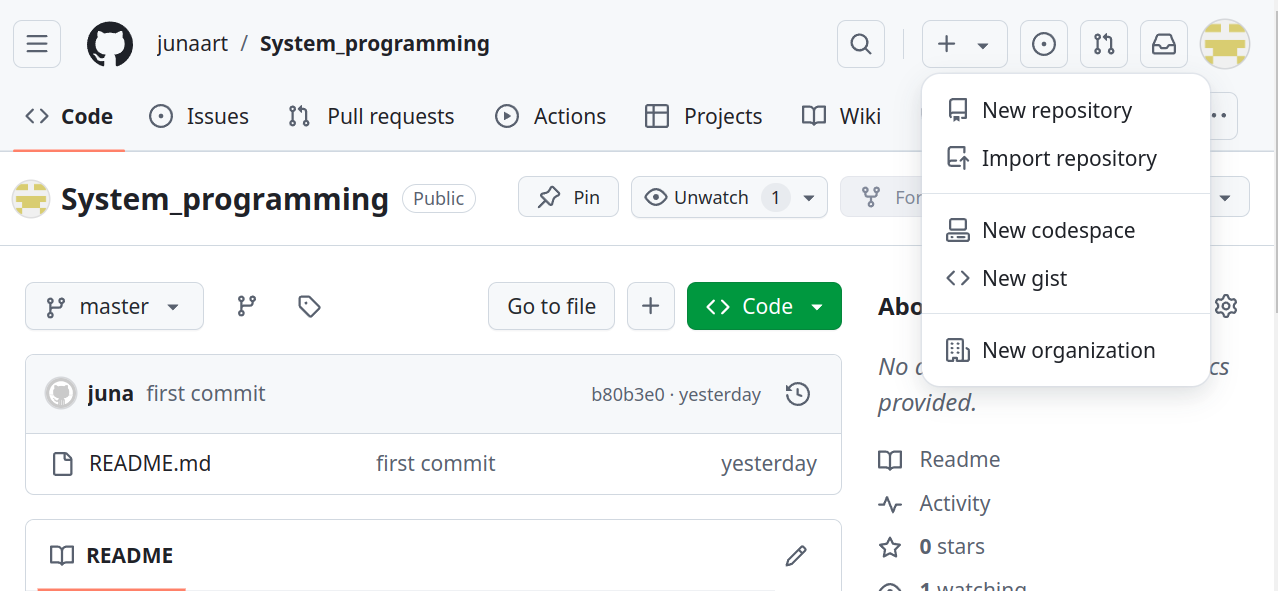

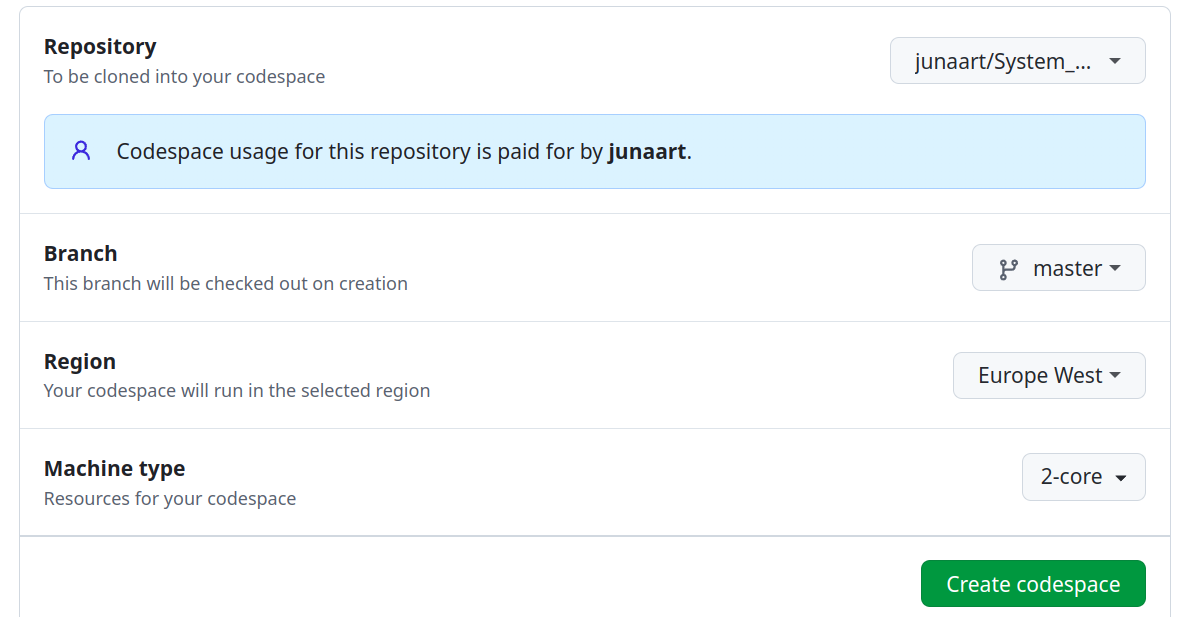

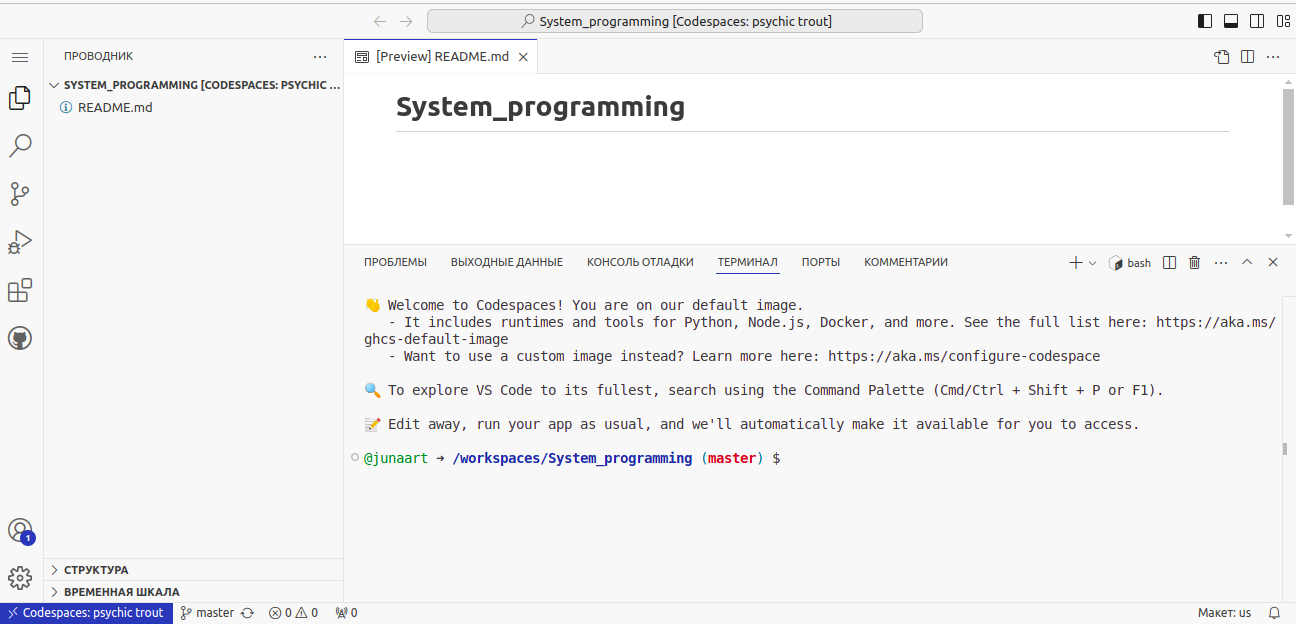

В результате мы получаем доступ к командной строке Linux (Debian) и можем создать необходимое рабочее окружение:

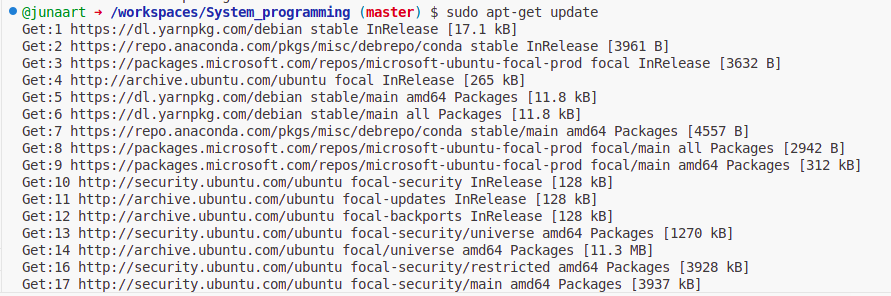

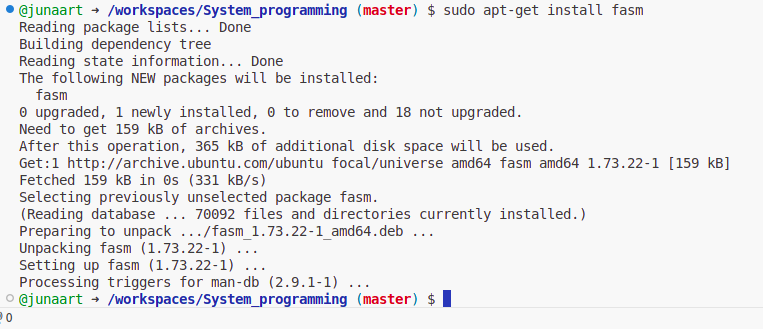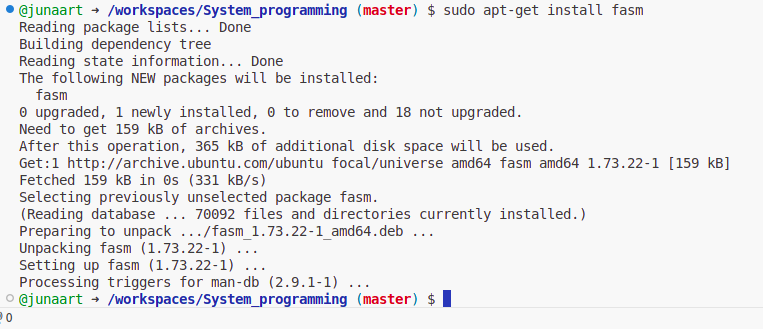

Попробуем создать первую рабочую программу типа "Hello, world!" на языке ассемблера fasm.

Вначале будем использовать 64-разрядную архитектуру - указываем формат под Linux ELF64. Соответственно нам становятся доступны 64-разрядные регистры: rax, rbx, ... 

Чтобы вывести информацию на экран нужно использовать системный вызов (обращение к операционной системе). В данном случае это команда **int 0x80**. Данная команда универсальна и может выполнять разные действия в зависимости от содержимого регистров. Для вывода на экран в регистор rax нужно загрузить число 4 (тип действия), в регистор rbx число 1, в регистор rcx  - адрес ячейки, хранящей начало выводимой строки, в регистор rdx  - количество выводимых символов строки. 

Пользовательская программа зависит от операционной системы даже в отношении завершения работы. Т.е. для завершения работы программы нужно также выполнить системный вызов **int 0x80**. В регистор rdx в этом случае загружается число 1, а в регистор rbx число 0, указывающее операционной системе, что программа корректно завершила работу (по аналогии с return 0; для языка C).

Перед началом собственно кода программы нужно создать метку вход - в данном случае **__start**. Само сообщение также нужно поместить в память. В коде это делается созданием метки msg, после чего указывается тип хранимых данных в каждой ячейке: тип **db** обозначает байт. Далее через запятую можно записать отдельные символы строки или всю строку в кавычках. Чтобы состоялся перевод каретки на новую строку, в конце строки необходимо добавить специальный символ **0xA**. Наконец, в ассемблере в отношении строк приняты те же соглашения, что в языке C - строка должна заканчиваться числом 0. 

In [ ]:
format ELF64
public _start
msg db "Hello, world", 0xA, 0

_start:
    ;инициализация регистров для вывода информации на экран
    mov rax, 4
    mov rbx, 1
    mov rcx, msg
    mov rdx, 14
    int 0x80
    ;инициализация регистров для успешного завершения работы программы
    mov rax, 1
    mov rbx, 0
    int 0x80

Создадим в кодовом пространстве тестовый файл и вставим вышепредложенный код:

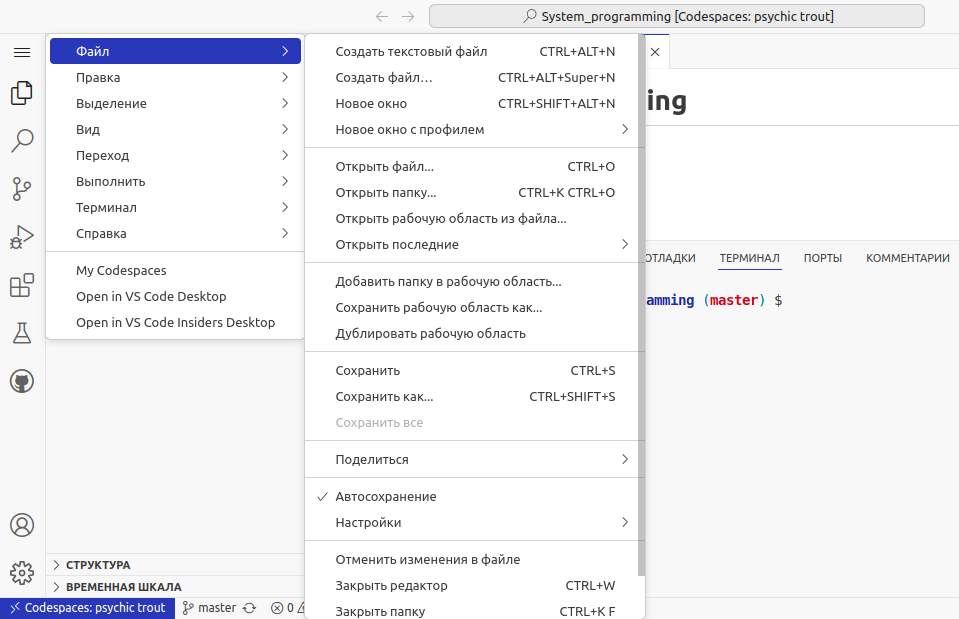

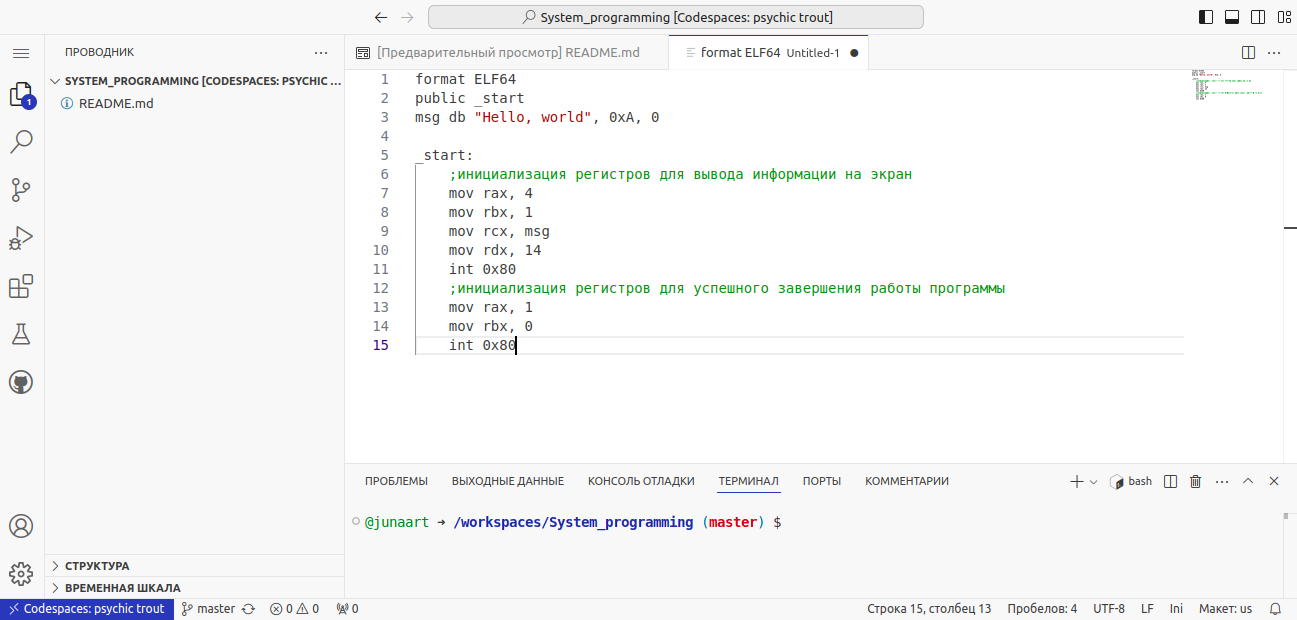

Сохраняем полученный код с именем first.asm:

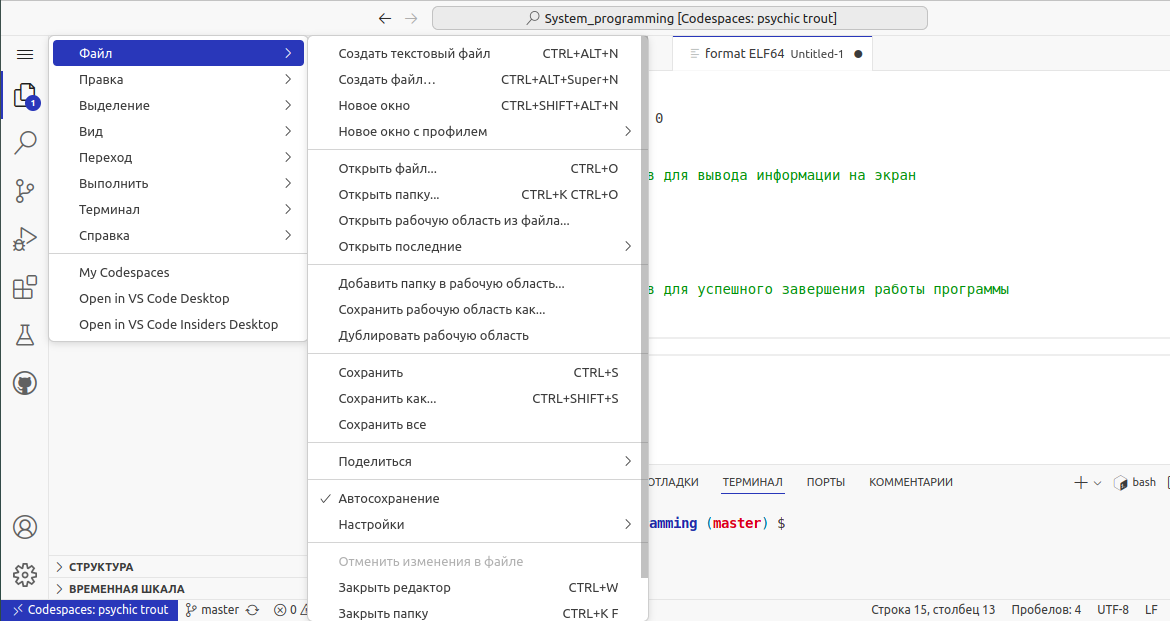

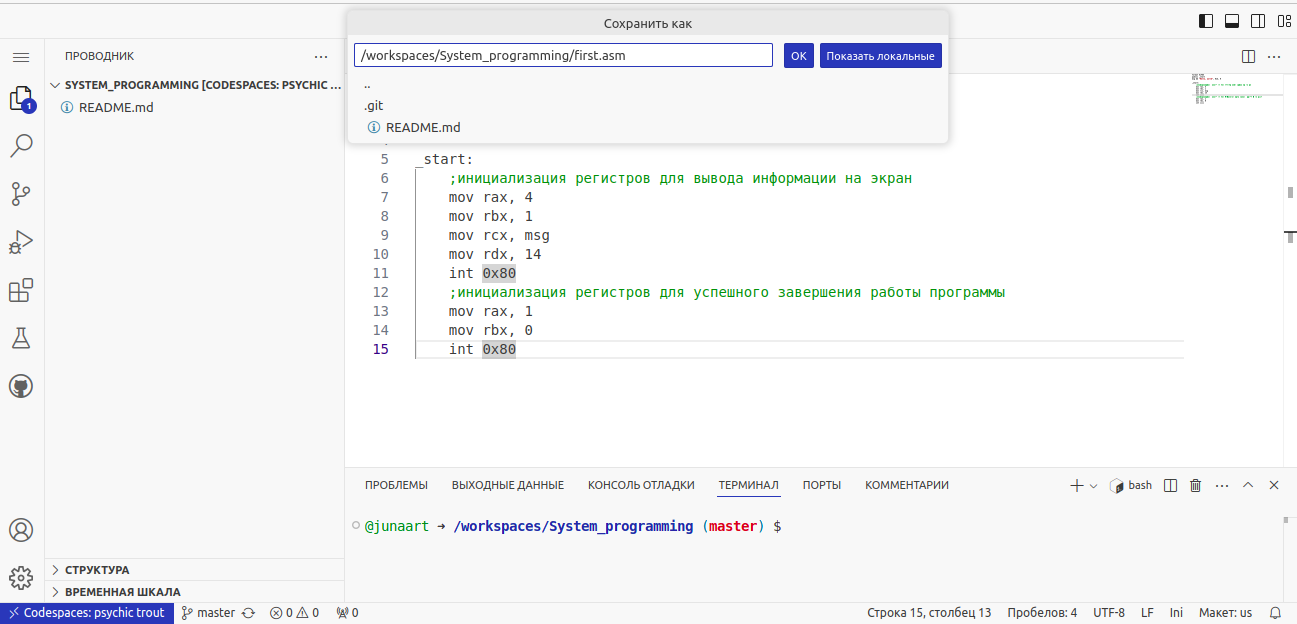

Теперь все готово для создания исполняемого файла. Этот процесс состоит из двух этапов:

1. создание объектного файла: fasm first.asm (в результате создается файл first.o)
2. линковка объектного файла, создание исполняемого файла: ld first.o (в результате создается исполняемый файл a.out)

Скриншот ниже демонстрируют этот процесс:

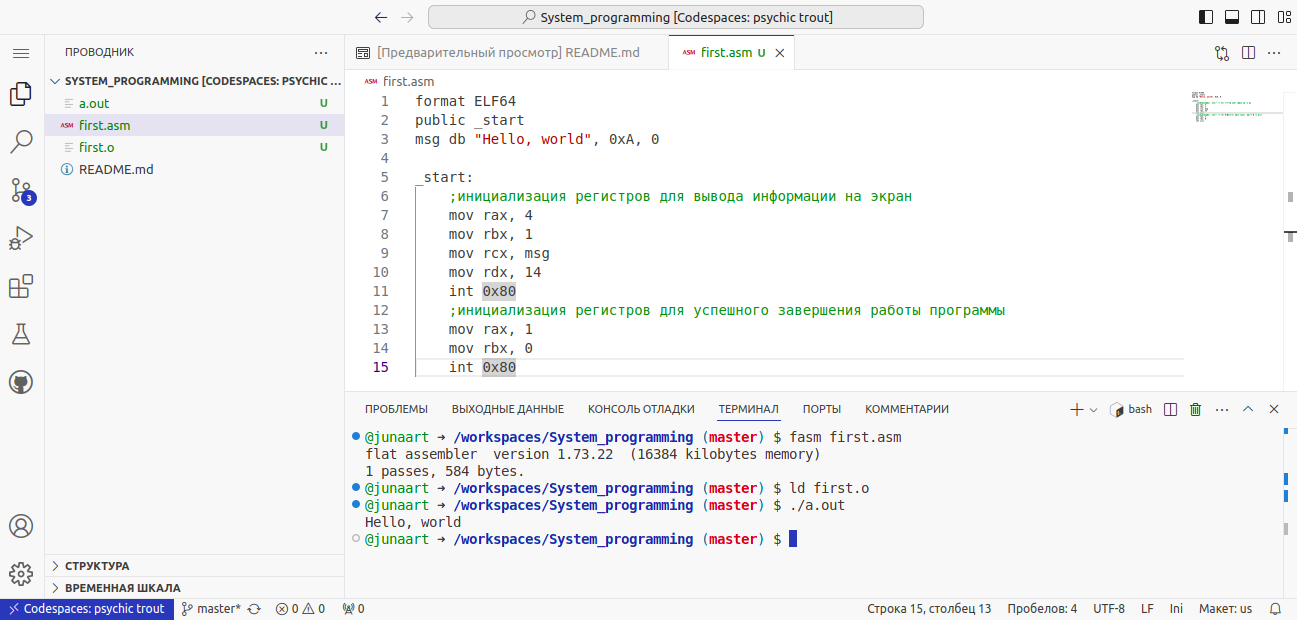


Оценим объем полученного исполняемого файла, а также попытаемся дизассемблировать его:

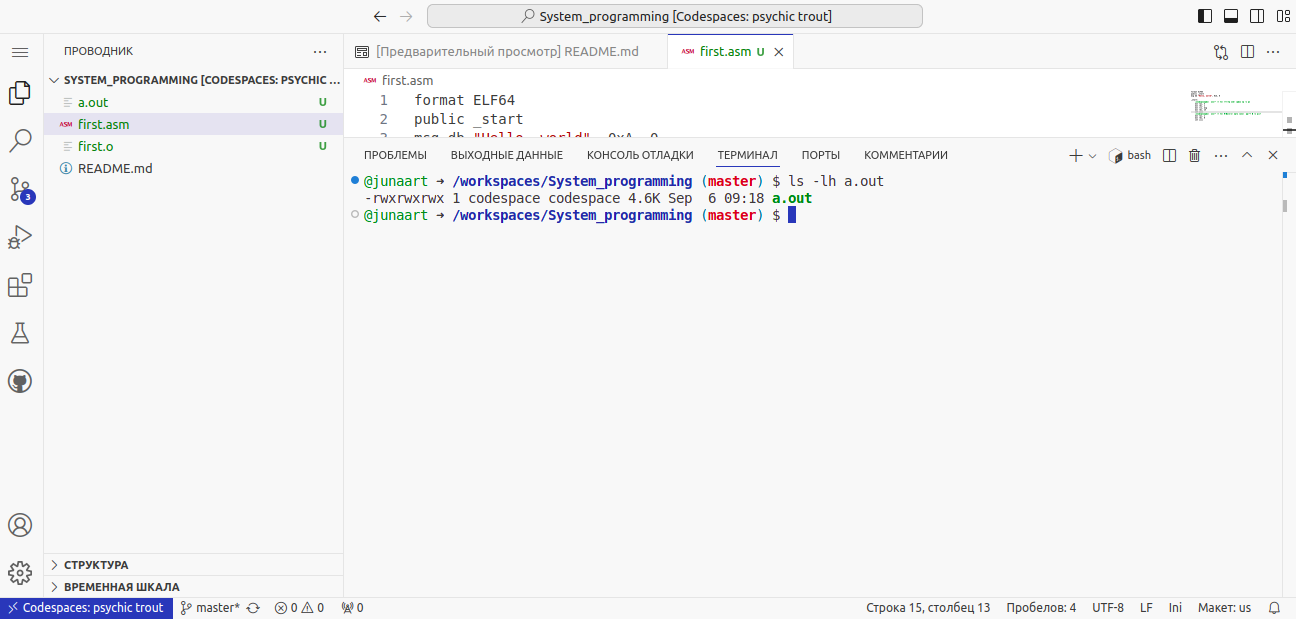

Для дизассемблирования используем утилиту отладчик **gdb**, предварительно установив его:

> sudo apt-get install gdb

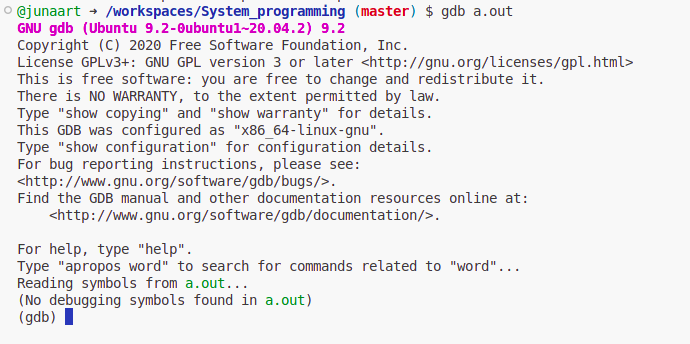

После запуска отладчика с параметром имени исполняемого файла, отладчик запускается и готов работать с этим файлом. Одной из команд является **disassemble** с указанием точки входа - в нашем случае __start:

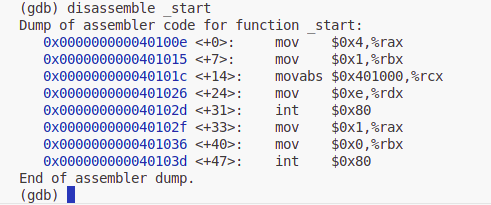

Как видно программа успешно дизассемблирована, правда в синтаксисе At & T. Для выхода из отладчика нужно набрать команду **quit**.

Для сравнения попробуем создать 32-битную версию нашей программы "Hello, world". 

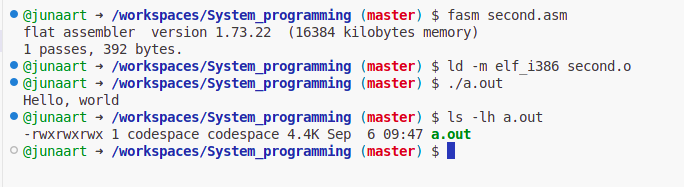

Обратите внимание на изменение параметров линковщика. Также видно, что объем программы получился чуть меньше.

Дизассемблирование также работает корректно:

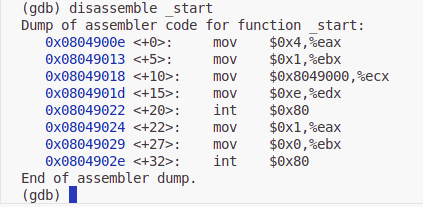



Для примера попробуем теперь построить аналогичную программу на языке C.

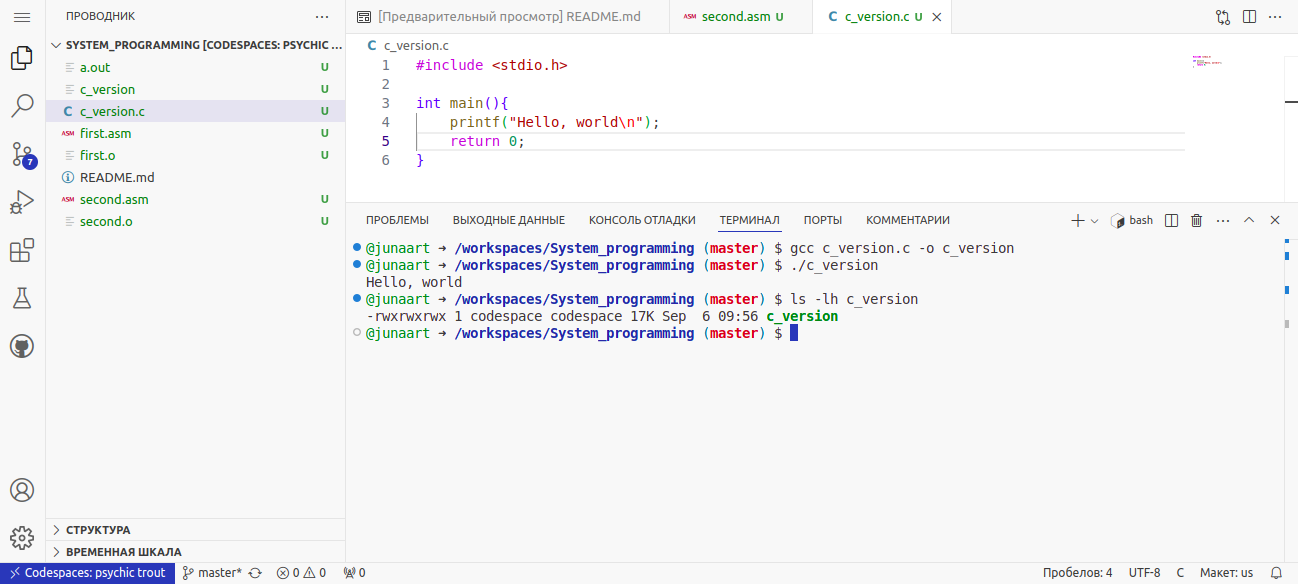

Исполняемый файл создан с именем c_version. Программа также корректно работает, но ее обхем уже 17 Кб, вместо 4.6 Кб (для 64-разрядной версии) или 4.4 Кб (для 32-разрядной версии).

Пробуем дизассемблировать, указав точку входа main:

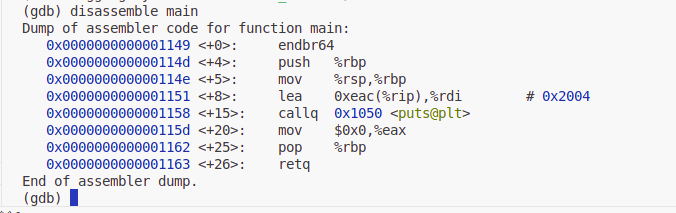


Работа с низкоуровневыми языками тесно сопряжена со взаимодействием с операционной системой. Поэтому ниже приводится справочный материал по основным командам в командной строке Linux (дистрибутив Ubuntu/Debian).

### Азы работы в командной строке Linux.

**Общие команды**

1. Выдает текущую дату

> date

Помощь по команде:

> date --help

> date -h

Справочная система по команде:

> man date

> info date

2. Информация о системе:

> uname

> uname -a

3. Информация об исполуемой памяти:

> free

> free -s 1

4. Информация о состоянии системы:

> uptime

5. Календарная информация:

> cal

6. Определяет имя пользователя, который залогинился:

> whoami

7. Информация об использовании дисков

> df

8. Информация ЦПУ

> cat /proc/cpuinfo

9. Информация об используемой памяти

> cat /proc/meminfo



**Команды работы с файлами**

1. Текущее местоположение

> pwd

2. Изменение текущего каталога:

> cd путь

Если написать 

> cd 

то перейдем в домашний каталог пользователя

> cd ./путь

Точка означает текущее местоположение. 

>cd ../путь

Две точки означают от текущего местоположенния на уровень выше.

3. Просмотр текущего каталога:
    
    > ls
    
    > ls -a
    
    >ls -al
    
-rwxrwxr-x  1 juna juna   16696 апр 15 07:29  a.out

a.out обычный файл

Первая rwx - права доступа владельца файла, r - право на чтение, w - право на запись, x - право на выполнение

Вторая rwx - права группы владельца файла

Третья r-x - права остальных (нет права на запись)

Другая форма обозначения прав доступа - числовая нотация.

r-x - 101(5)
rwx - 111(7)
--x - 001(1)
-wr - 011(3)  

753 - rwxr-x-wx

Если drwxrwxr-w - это каталог. В Linux все есть файл. Каталог - это специальный файл.

Кроме - и d, могут встречаться: l - ссылка, b - блочное устройство, c - символьное устройство.

4. Создание каталога

> mkdir name



5. Создание файла (текстовый файл):
    
> touch имя

6. Копирование файла:
    
    > cp путь_к_файлу(что) путь_к_приемнику_файла(куда)
    
При копировании каталогов необходимо указывать ключ -r

7. Перемещение файла:

> mv путь_к_файлу(что) путь_к_приемнику_файла(куда)

8. Переименования файла:
    
    > mv путь_к_файлу(что) тот_же_самый_путь_к_файлу_новое имя

9. Удаление файлов:
    
    > rmdir имя_каталога (каталог должен быть пустым)
    
    >rm Имя_файла_для_удаления
    
Для удаления непустой директории со всем ее содержимым необходимо использовать тот же rm с ключем r:
    
    > rm -r имя_каталога

10. Создание символической ссылки:

> ln-s имя_файла имя_ссылки

11. Просмотр содержимого файла:
    
    > cat имя_файла
    
    > more имя_файла (для просмотра больших текстовых файлов)
    
    > head -n count имя_файла - показывает первые count строк файла
    
    > tail -n count имя_файла - показывает последние count строк файла

12. Перенаправление ввода/вывода

> cat имя_файла_1 > имя_файла_2: содержимое файла 1 запишется в содержимое файла 2

Если файл с именем "имя_файла_2" уже был, то он полностью перезаписываеся

> cat имя_файла_1 >> имя_файла_2: содержимое файла 1 допишется  к содержимому файла 2

> cat < имя_файла - передать на вход программе содержимое файла

In [ ]:
mysql -u juna -p -h localhost psr < /home/dima/programs_dump.sql

13. Использование каналов

Канал  - программный интерфейс, позволяющий обмениваться данными разным процессам

cat имя_файла | head -n 2 | more

14. grep - специальная утилита по фильтрации текста

> grep шаблон имя_файла



### Команды работы с процессами

**Процесс** - запущенная в операционной системе программа, использующая при своей работе ресурсы процессора и оперативной памяти.

1. Просмотр списка процессов:
    
    > ps - процессы, запущенные в текущей консоли

    > ps uax - получить список всех процессов
    
2. Команды управления процессами.

Жизненный цикл процесса: создание, загрузка, выполнение, состояние зомби, умирание процесса.

Можно управлять процессами с помощью сигналов.

> kill signal  PID - посылает сигнал процессу с идентификаторов PID

> kill 9 PID - убивает процесс

    

## Команды архивации

Архиватор tar

> tar -cf имя_архива.tar список файлов #архивация файлов

> tar -xf имя_архива.tar #разархивирует файлы

>  gzip имя_файла #сжимает файл

> gzip -d имя_файла #выполняет декомпрессию файла



## Командные оболочки

1. Переменные:

Присвоить значение перерменной:

d=1234

Напечатать значение переменной:

echo $d

Системные переменные:

PATH, PWD, HOME, SHELL, USER, HOSTNAME

Все значения переменных воспринимаются как просто текст. Если текст разделен пробелами, то нужно использовать экранирование:

или знак \, или ", или '.

Одинарные кавычки экранируют все символы, двойные кавычки не экранируют специальные символы.

2. Состав командных оболочек:
    
    наиболее продвинутая bash
    
 Остальные:   https://ru.wikipedia.org/wiki/%D0%9A%D0%BE%D0%BC%D0%B0%D0%BD%D0%B4%D0%BD%D0%B0%D1%8F_%D0%BE%D0%B1%D0%BE%D0%BB%D0%BE%D1%87%D0%BA%D0%B0_Unix
 
Командные оболочки помогают использовать язык Shell.



In [ ]:
#Пример 1.

#!/bin/bash

cd 
mkdir trast
cd trast
touch p

3. Операции сравнения

В случае, если условие верно, оператор сравнения возвращает 0. Проверить возвращаемое значение можно с помощью $?

In [ ]:
[ -d name ] - проверяет, является ли name каталогом
[ f name ]  - -//- файлом
[ -r name ] - если ли право на чтение
[ -w name ] - если ли право на запись
[ -x name ] - если ли право на выполнение
[ -z str ]  - является ли str пустой строкой
[ $str1 = $str2 ] проверяет равны ли строки
[ $str1 != $str2 ] проверяет неравны ли строки
[ $d1 -eq $d2 ] равны ли числа
      -ne не равны
      -gt больше
      -lt меньше
      -ge больше или равно
      -le меньше или равно

К скрипту можно передавать параметры. Для их получения в программе используются:
    
    $0 - имя скрипта
    
    $1 - первый параметр
    
    $2 - второй параметр и т.д.

4. Условная конструкция:


In [ ]:
if [ -f name ]; then
   операторы, если условие верно
elif [ ... ]; then
   операторы, если условие верно
...
else
 операторы иначе
fi

#Пример

#!/bin/bash

if [ $3 = "+" ]; then
  u=$(($1+$2))
  echo $u
elif [ $3 = "-" ]; then
  u=$(($1-$2))
  echo $u
else
  echo "Error"
fi

exit

5. Циклы

In [ ]:
Цикл for
for i in $<список>
do
  <действия>
done

Пример:

#!/bin/bash

h=`ps uax`

for i in $h
do
  echo $i
done

exit



In [ ]:
Цикл while

while <условие>
 do
 <действия>
 done

На последнем скриншоте приведен пример создания песочницы, перемещения в нее всех созданных файлов, а также сохранение изменений в системе git:

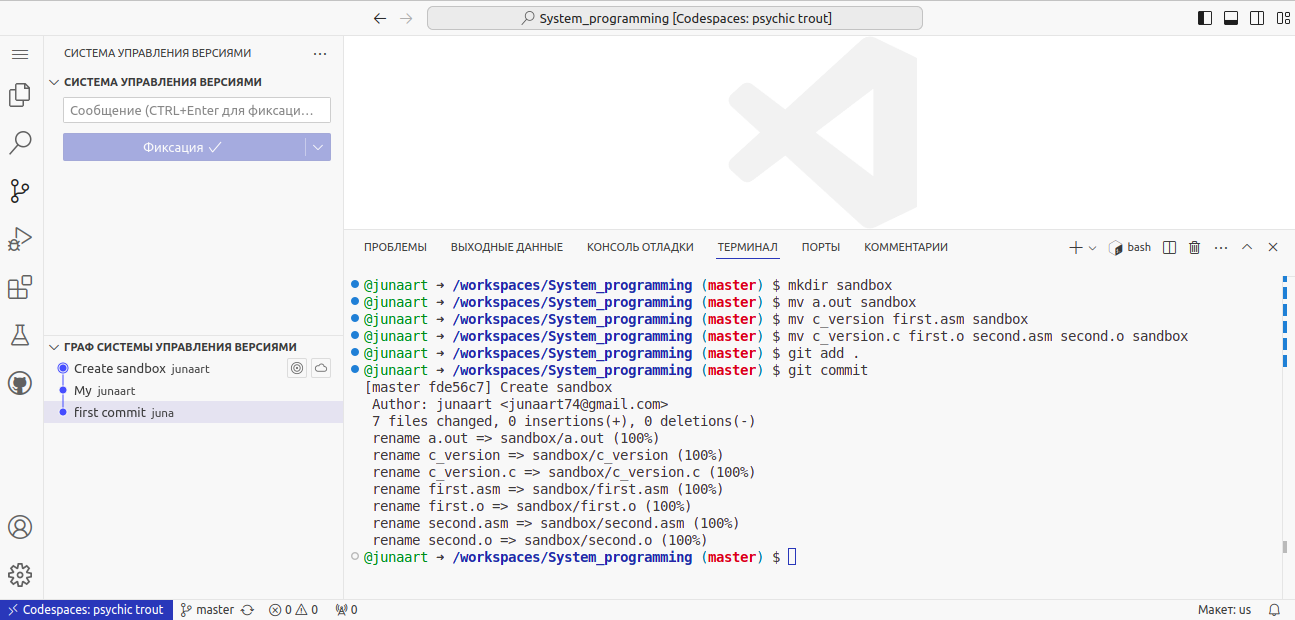